# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns
sns.set()

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline


# Dataset for linear regression

In [2]:
columns = ['VENDOR', 'MODEL_NAME', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df = pd.read_csv('CH_dataset.csv', names=columns)

print('First 5 elements from the dataset : \n\n', df.head(), '\n\n')
print('Number of elements in the dataset : ', df.size, '\n\n')
print('The shape of the DataFrame : ', df.shape, '\n\n')

print('Information about our dataset : \n\n', df.info(), '\n\n')

First 5 elements from the dataset : 

     VENDOR MODEL_NAME  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  adviser      32/60   125   256   6000   256     16    128  198  199
1   amdahl     470v/7    29  8000  32000    32      8     32  269  253
2   amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3   amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4   amdahl    470v/7c    29  8000  16000    32      8     16  132  132 


Number of elements in the dataset :  2090 


The shape of the DataFrame :  (209, 10) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
VENDOR        209 non-null object
MODEL_NAME    209 non-null object
MYCT          209 non-null int64
MMIN          209 non-null int64
MMAX          209 non-null int64
CACH          209 non-null int64
CHMIN         209 non-null int64
CHMAX         209 non-null int64
PRP           209 non-null int64
ERP           209 non-null int64
dtypes:

###### Eliminate the object-type columns 'VENDOR' and 'MODEL_NAME'

In [3]:
categorical_Columns = df.iloc[:,:2]
df = df.drop(categorical_Columns, axis=1)

print('New dataset : \n\n', df.head(), '\n\n')

New dataset : 

    MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0   125   256   6000   256     16    128  198  199
1    29  8000  32000    32      8     32  269  253
2    29  8000  32000    32      8     32  220  253
3    29  8000  32000    32      8     32  172  253
4    29  8000  16000    32      8     16  132  132 




###### Target variable - ERP (estimated relative performance)

In [4]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

print('Features : \n\n', X.columns, '\n\n')
print('Target : \n\n', Y.head(n=5), '\n\n')

Features : 

 Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP'], dtype='object') 


Target : 

 0    199
1    253
2    253
3    253
4    132
Name: ERP, dtype: int64 




# Splitting the dataset into train / test ( with 20% test data )

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10, shuffle=True)

print('Number of values in the train dataset : ', X_train.shape[0], '\n\n')
print('Number of values in the test dataset : ', X_test.shape[0], '\n\n')

print('First element on the training set after shuffle : \n\n', X_train.head(n=1), '\n\n') 

Number of values in the train dataset :  167 


Number of values in the test dataset :  42 


First element on the training set after shuffle : 

      MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX  PRP
159    56  1000  4000     0      1      6   17 




# Preprocessing the features labels

In [6]:
scaler_SK = StandardScaler()
scaler_SK.fit(X_train)               # compute the mean and the standard deviation on the training set

X_train = scaler_SK.transform(X_train)        # transform the training set with normalization around the mean 
X_test = scaler_SK.transform(X_test)          # transform the test set with normalization around the mean


print('First 3 elements on the training set after normalization : \n\n', X_train[0:3], '\n\n')
print('First value on the training set after normalization : \n\n', X_train[0], '\n\n')
print('First value on the test set after normalization : \n\n', X_test[0], '\n\n')


First 3 elements on the training set after normalization : 

 [[-0.5352718  -0.4761972  -0.66651134 -0.6244539  -0.53714846 -0.46359547
  -0.54005531]
 [ 0.84027256 -0.22004526 -0.66651134 -0.6244539  -0.53714846 -0.6424782
  -0.45267957]
 [-0.11940955 -0.60119935 -0.66651134 -0.57787784 -0.53714846 -0.49937202
  -0.46432967]] 


First value on the training set after normalization : 

 [-0.5352718  -0.4761972  -0.66651134 -0.6244539  -0.53714846 -0.46359547
 -0.54005531] 


First value on the test set after normalization : 

 [-0.55926385  0.29225863  0.3226342   0.86598007  0.01318156 -0.32048929
  0.00749931] 




# Preprocessing the target label

In [7]:
print('First 3 elements for the target variable on the training set after shuffle : \n\n', Y_train.head(n=3), '\n\n') 
print('The values of the target variable on the training set : \n\n', Y_train.values, '\n\n')

Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

print('The first 3 values of the target variable of the training set after reshaping : \n\n', Y_train[0:3], '\n\n')


scaler_SK = StandardScaler()
scaler_SK.fit(Y_train)               # compute the mean and the standard deviation on the training set

Y_train = scaler_SK.transform(Y_train)        # transform the training set with normalization around the mean 
Y_test = scaler_SK.transform(Y_test)          # transform the test set with normalization around the mean

First 3 elements for the target variable on the training set after shuffle : 

 159    26
105    28
176    25
Name: ERP, dtype: int64 


The values of the target variable on the training set : 

 [  26   28   25   52   32   22   76   20   15   72   62   37   82  117
   34   24  978  381   28   21  190   33   28   74  120   39  128  101
   44   42   80   47   20   18   40   44   50   26  281  182   18  181
   28   24   82   74   23   30   74   31   36   21   36   67   29  116
   19   15   73   25   56   27  253   45   29  360   29  919   25  341
   41  267  220   81   24   26   74   80   88   53   24  142  270   99
   95   64   70   31   24   28   46  151   20  138   17   34   48   41
   35  132   46   54  350   47   28   88  107   67  149   54   59  227
   41   33   25   24  275  171  266  126   53   82   22   22   23   34
  102  157   53   57   21  102   29   32   53   44  426  117   50  183
   43   20  382   74   19   18   18  175   30   29   21   23   76   78
   41  199   23  749   

E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Distribution of the target variable

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


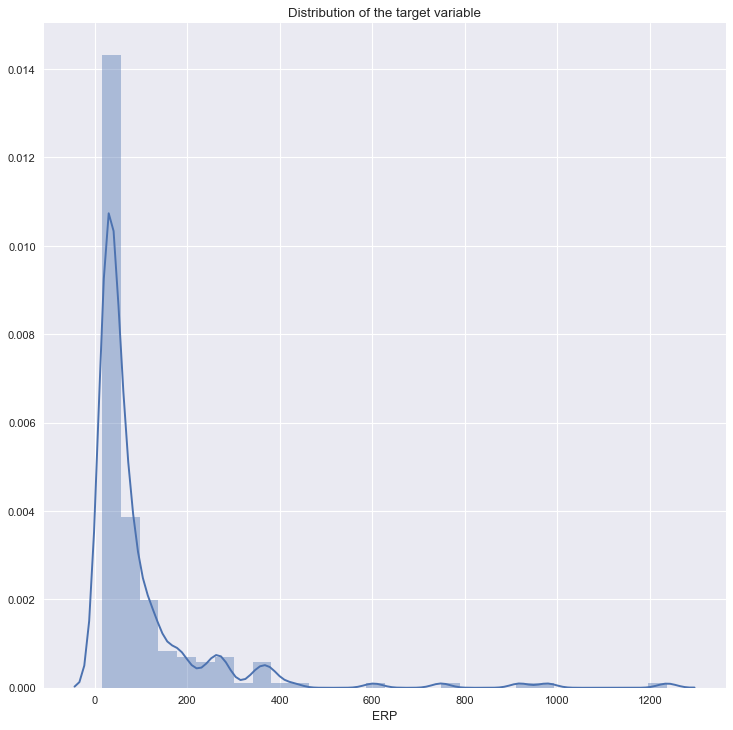

In [8]:
plt.figure(figsize=(11, 11), dpi=80)
sns.distplot(Y, bins=30)
plt.title('Distribution of the target variable')
plt.show()

# Distributions of the feature variables

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced 

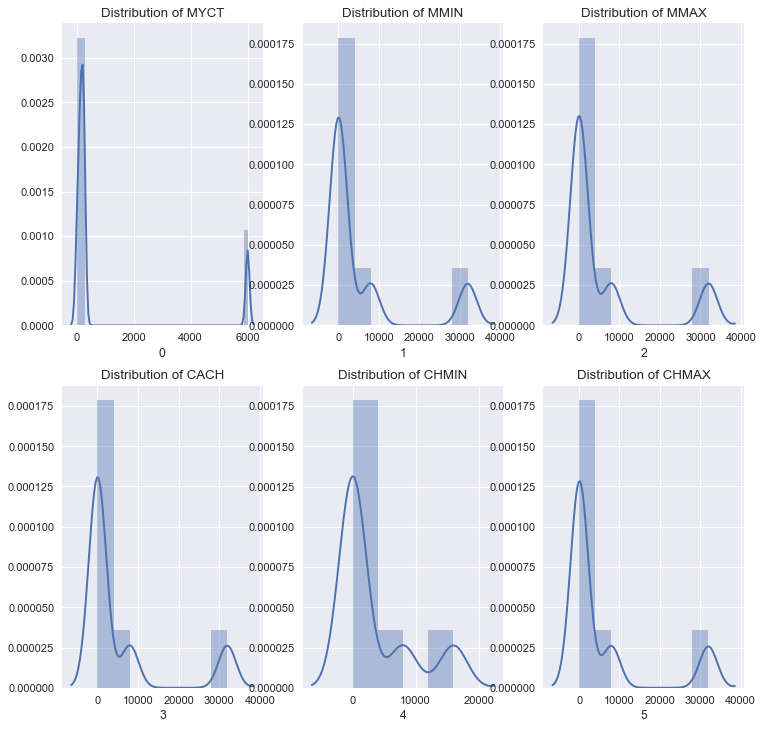

In [9]:
plt.figure(figsize=(11, 11), dpi=80)
for i in range(6) :
    plt.subplot(2, 3, i+1)
    sns.distplot(X.iloc[i])
    plt.title('Distribution of '+ X.columns[i])
plt.show()

# Training the linear model

In [10]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Score values on the training set

In [11]:
model_1_score = model_1.score(X_train, Y_train)
print('R2 coefficient on the training dataset : ', model_1_score, '\n\n')

R2 coefficient on the training dataset :  0.9618659389229464 




# Error prediction on the test set

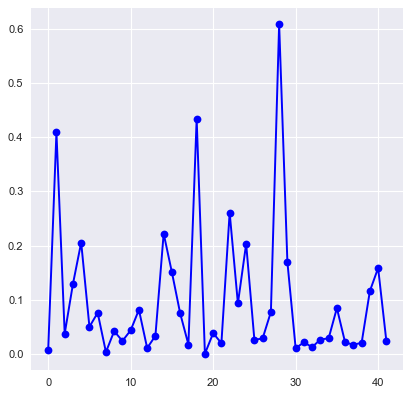

In [12]:
Y_predict = model_1.predict(X_test)
err = abs(Y_predict - Y_test)             # absolute errors on the test set

plt.figure(figsize=(6, 6), dpi=80)
plt.plot(err, 'bo-')
plt.show()

# Coefficients of the multi-linearity prediction values

In [13]:
print('Model slope : \n\n', model_1.coef_[0], '\n\n')  # returns an array, because we have multi-linearity
print('Model intercept : \n\n', model_1.intercept_, '\n\n')

Model slope : 

 [0.05852401 0.15843804 0.24959636 0.02299146 0.00352689 0.06227601
 0.58728811] 


Model intercept : 

 [1.08122025e-17] 




# Accuracy-type values on the test dataset

In [14]:
print('Mean Squared Error on the test dataset : ', mean_squared_error(Y_test, Y_predict), '\n\n')
print('R2 Score on the test dataset : ', r2_score(Y_test, Y_predict), '\n\n')

Mean Squared Error on the test dataset :  0.0259399050324069 


R2 Score on the test dataset :  0.9161599328534319 




# Multi-linearity with different polynomial degrees

In [15]:
def PolynRegress(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [16]:
print('Choose degree for slope and intercept values : ')
i = int(input())
print('\n\n')

degreeArray = [1, 2, 3, 4, 5, 6, 7]
for degree in degreeArray:
    y_LinRegress = PolynRegress(degree)
    aux_LR = y_LinRegress.named_steps['linearregression']
    y_fit = y_LinRegress.fit(X_train, Y_train)
    if degree == i:
        coeffPol = aux_LR.coef_[0]
        interceptPol = aux_LR.intercept_
    y_new = y_fit.predict(X_test)
    print('R2 score with for polyn. degree ', degree, ' is : ', r2_score(Y_test, y_new), '\n')

print('Linear Regress. slope for polyn. degree', i, 'is : \n\n',  coeffPol, '\n\n')
print('Linear Regress. intercept for polyn. degree', i, 'is : ',  interceptPol, '\n\n')


Choose degree for slope and intercept values : 
1



R2 score with for polyn. degree  1  is :  0.9161599328534317 

R2 score with for polyn. degree  2  is :  0.9976977912040321 

R2 score with for polyn. degree  3  is :  0.9860643169527233 

R2 score with for polyn. degree  4  is :  0.17237414999813483 

R2 score with for polyn. degree  5  is :  -3.2164118837197524 

R2 score with for polyn. degree  6  is :  -5.2096579313737905 

R2 score with for polyn. degree  7  is :  -71.62016863316592 

Linear Regress. slope for polyn. degree 1 is : 

 [0.         0.05852401 0.15843804 0.24959636 0.02299146 0.00352689
 0.06227601 0.58728811] 


Linear Regress. intercept for polyn. degree 1 is :  [-2.19547802e-17] 




# Correlation between the feature variables

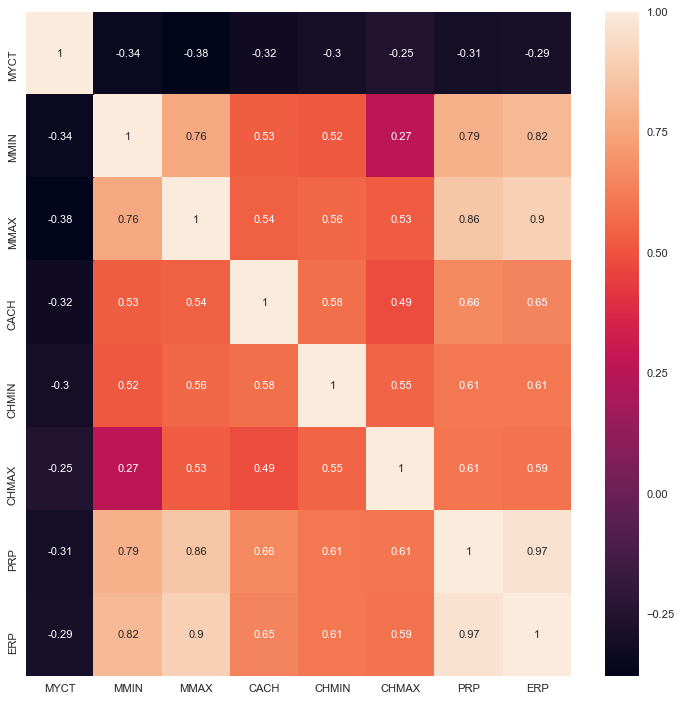

In [17]:
plt.figure(figsize=(11, 11), dpi=80)
corrMatrix = df.corr()
sns.heatmap(data=corrMatrix, annot=True)
plt.show()

# Remarks for the correlation matrix

In [18]:
# MYCT has low correlation with every feature => we drop this column
# MMIN has a high corr. coeff. (0.76) with MMAX => we drop MMNIN column
# MMAX and PRP have high corr. coeff. with target ERP => we need these columns
# We drop the other features, because they do not have high corr. coeff.

X = X[['MMAX', 'PRP']]
print('The first 5 elements of the selected features : \n\n ', X.head(), '\n\n')

The first 5 elements of the selected features : 

      MMAX  PRP
0   6000  198
1  32000  269
2  32000  220
3  32000  172
4  16000  132 




# Plot the features vs. target label

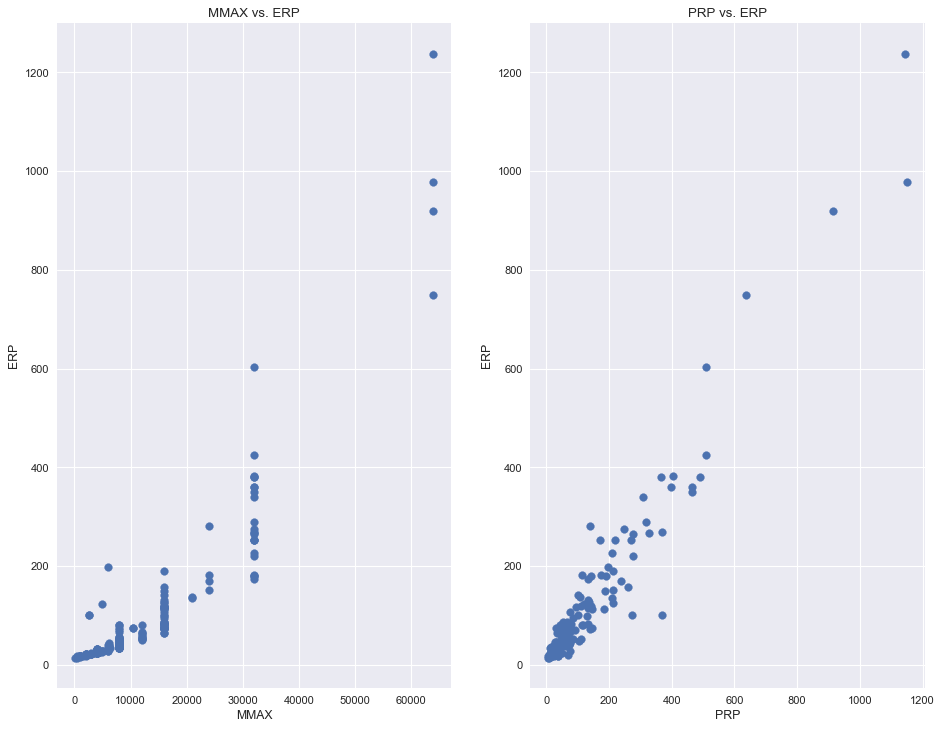

In [19]:
plt.figure(figsize=(14, 11), dpi=80)
plt.subplot(1, 2, 1)
plt.scatter(X['MMAX'], Y)
plt.xlabel('MMAX')
plt.ylabel('ERP')
plt.title('MMAX vs. ERP')

plt.subplot(1, 2, 2)
plt.scatter(X['PRP'], Y)
plt.xlabel('PRP')
plt.ylabel('ERP')
plt.title('PRP vs. ERP')
plt.show()

# Preprocessing the 2 features and the target variable

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10, shuffle=True)

scaler_SK = StandardScaler()
scaler_SK.fit(X_train)               # compute the mean and the standard deviation on the training set

X_train = scaler_SK.transform(X_train)        # transform the training set with normalization around the mean 
X_test = scaler_SK.transform(X_test)          # transform the test set with normalization around the mean


print('First 3 elements on the training set after normalization : \n\n', X_train[0:3], '\n\n')
print('First value on the training set after normalization : \n\n', X_train[0], '\n\n')
print('First value on the test set after normalization : \n\n', X_test[0], '\n\n')

Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

print('The first 3 values of the target variable of the training set after reshaping : \n\n', Y_train[0:3], '\n\n')


scaler_SK = StandardScaler()
scaler_SK.fit(Y_train)               # compute the mean and the standard deviation on the training set

Y_train = scaler_SK.transform(Y_train)        # transform the training set with normalization around the mean 
Y_test = scaler_SK.transform(Y_test)          # transform the test set with normalization around the mean

First 3 elements on the training set after normalization : 

 [[-0.66651134 -0.54005531]
 [-0.66651134 -0.45267957]
 [-0.66651134 -0.46432967]] 


First value on the training set after normalization : 

 [-0.66651134 -0.54005531] 


First value on the test set after normalization : 

 [0.3226342  0.00749931] 


The first 3 values of the target variable of the training set after reshaping : 

 [[26]
 [28]
 [25]] 




E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Training and fitting with high degree polynomials

In [21]:
print('Choose degree for slope and intercept values : ')
i = int(input())
print('\n\n')

degreeArray = [1, 2, 3, 4, 5, 6, 7]
for degree in degreeArray:
    y_LinRegress = PolynRegress(degree)
    aux_LR = y_LinRegress.named_steps['linearregression']
    y_fit = y_LinRegress.fit(X_train, Y_train)
    if degree == i:
        coeffPol = aux_LR.coef_[0]
        interceptPol = aux_LR.intercept_
    y_new = y_fit.predict(X_test)
    print('R2 score with for polyn. degree ', degree, ' is : ', r2_score(Y_test, y_new), '\n')

print('Linear Regress. slope for polyn. degree', i, 'is : \n\n',  coeffPol, '\n\n')
print('Linear Regress. intercept for polyn. degree', i, 'is : ',  interceptPol, '\n\n')

# We can observe that the R2 score is much better only with the highly correlated features

Choose degree for slope and intercept values : 
1



R2 score with for polyn. degree  1  is :  0.9309018749912177 

R2 score with for polyn. degree  2  is :  0.9657668125429328 

R2 score with for polyn. degree  3  is :  0.9601874228152298 

R2 score with for polyn. degree  4  is :  0.9539624533753002 

R2 score with for polyn. degree  5  is :  0.957923582796941 

R2 score with for polyn. degree  6  is :  0.9658129234184762 

R2 score with for polyn. degree  7  is :  0.9656541900449077 

Linear Regress. slope for polyn. degree 1 is : 

 [0.         0.26766489 0.73524535] 


Linear Regress. intercept for polyn. degree 1 is :  [1.20891358e-17] 




# Data normalization on the 1st feature

In [22]:
X1 = X['MMAX']
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X1, Y, test_size=0.20, random_state=10, shuffle=True)

scaler_SK_1 = StandardScaler()
scaler_SK_1.fit(X_train_1[:, np.newaxis])               # compute the mean and the standard deviation on the training set : feature 1

X_train_1 = scaler_SK_1.transform(X_train_1[:, np.newaxis])        # transform the training set with normalization around the mean : feature 1
X_test_1 = scaler_SK_1.transform(X_test_1[:, np.newaxis])          # transform the test set with normalization around the mean : feature 1




Y_train_1 = Y_train_1.values.reshape(-1, 1)
Y_test_1 = Y_test_1.values.reshape(-1, 1)


scaler_SK_1 = StandardScaler()
scaler_SK_1.fit(Y_train_1)               # compute the mean and the standard deviation on the training set : feature 1

Y_train_1 = scaler_SK_1.transform(Y_train_1)        # transform the training set with normalization around the mean : feature 1
Y_test_1 = scaler_SK_1.transform(Y_test_1)          # transform the test set with normalization around the mean : feature 1



E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Training and fitting with high degree polynomials on feature no. 1

In [23]:
X_sorted_test_1 = np.sort(X_test_1.ravel()).reshape(-1, 1)
predictedValues_array = []
degreeArray = [1, 2, 3, 4, 5, 6, 7]

for degree in degreeArray:
    
    y_LinRegress = PolynRegress(degree)
    aux_LR = y_LinRegress.named_steps['linearregression']
    y_fit = y_LinRegress.fit(X_train_1, Y_train_1)
    
    y_new = y_fit.predict(X_sorted_test_1)
    
    predictedValues_array.append(y_new)
    
    print('Linear Regress. slope for polyn. degree', degree, 'is : ',  aux_LR.coef_[0])
    print('Linear Regress. intercept for polyn. degree', degree, 'is : ',  aux_LR.intercept_)
    print('R2 score with for polyn. degree ', degree, ' is : ', r2_score(Y_test, y_new), '\n\n')  
    

Linear Regress. slope for polyn. degree 1 is :  [0.         0.90410019]
Linear Regress. intercept for polyn. degree 1 is :  [-3.89772118e-17]
R2 score with for polyn. degree  1  is :  -2.0791898022339548 


Linear Regress. slope for polyn. degree 2 is :  [0.         0.52380514 0.17415175]
Linear Regress. intercept for polyn. degree 2 is :  [-0.17415175]
R2 score with for polyn. degree  2  is :  -1.3207003678641516 


Linear Regress. slope for polyn. degree 3 is :  [ 0.          0.51738404  0.22008216 -0.01051209]
Linear Regress. intercept for polyn. degree 3 is :  [-0.19712693]
R2 score with for polyn. degree  3  is :  -1.3898789091494335 


Linear Regress. slope for polyn. degree 4 is :  [ 0.          0.48004937  0.19955372  0.03037707 -0.00797164]
Linear Regress. intercept for polyn. degree 4 is :  [-0.19469821]
R2 score with for polyn. degree  4  is :  -1.3934412961227847 


Linear Regress. slope for polyn. degree 5 is :  [ 0.          0.47066944  0.3231742   0.0722279  -0.1077725  

# Plotting the fitting line for feature no. 1

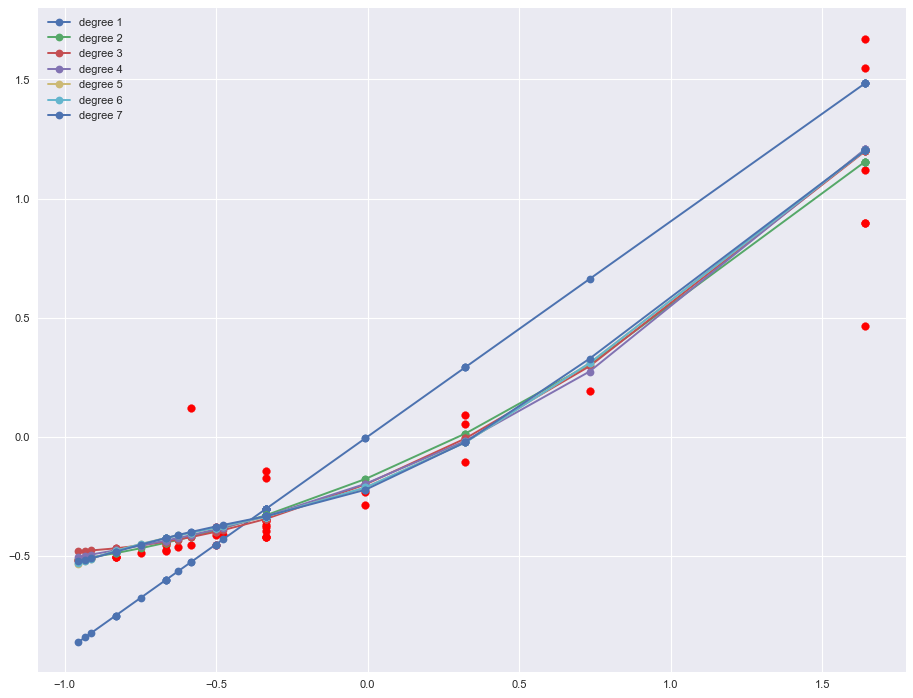

In [24]:
plt.figure(figsize=(14, 11), dpi=80)
plt.scatter(X_test_1.ravel(), Y_test_1.ravel(), color='red')
for count, degree in enumerate(degreeArray):
    plt.plot(X_sorted_test_1.ravel(), predictedValues_array[count].ravel(), 'o-', label='degree '+ str(degree))
plt.legend()    
plt.show()


# Grid search for the polynomial parameters

In [25]:
paramGrid = {'polynomialfeatures__degree' : np.arange(10), 
            'linearregression__fit_intercept' : [True, False]}

gridSearch = GridSearchCV(PolynRegress(), paramGrid)
resultsGrid = gridSearch.fit(X_train_1, Y_train_1.ravel())

print('Best parameters using Grid Search CV : \n', resultsGrid.best_params_, '\n\n')

Best parameters using Grid Search CV : 
 {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2} 




# Define and plot model results using grid search

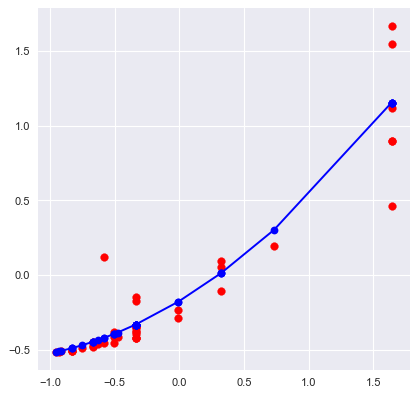

In [26]:
modelGrid = gridSearch.best_estimator_

y_fit = modelGrid.fit(X_train_1, Y_train_1)
y_new = y_fit.predict(X_sorted_test_1)

plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(X_test_1.ravel(), Y_test_1.ravel(), color='red')
plt.plot(X_sorted_test_1.ravel(), y_new.ravel(), 'bo-')
plt.show()

# Plotting the ROC ( validation ) curve for the training and testing datasets

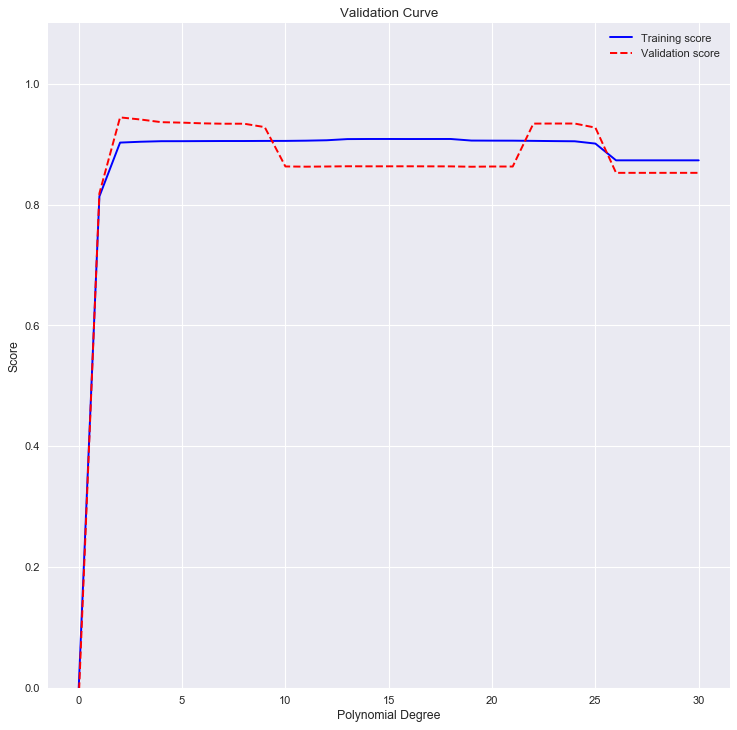

In [27]:
degreeArray = np.arange(0, 31)
train_score, val_score = validation_curve(PolynRegress(), X_train_1, Y_train_1, 'polynomialfeatures__degree', degreeArray)

plt.figure(figsize=(11, 11), dpi=80)
plt.plot(degreeArray, np.median(train_score, 1), color='blue', label='Training score')
plt.plot(degreeArray, np.median(val_score, 1), color='red', label='Validation score', linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1.1)
plt.xlabel('Polynomial Degree')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.show()

# Learning curves vs. training size for polynomial of degree 2

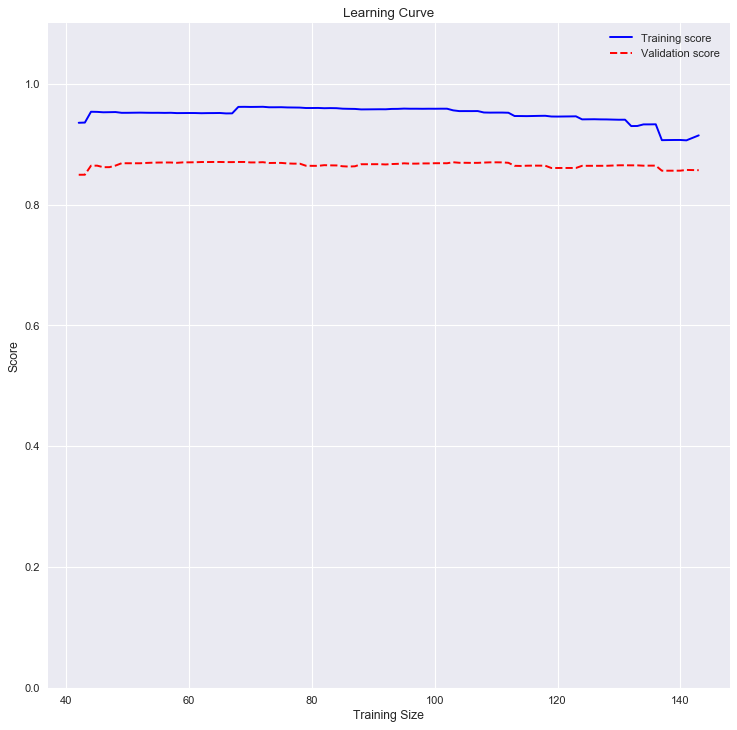

In [28]:
degree = 2
N, train_score, val_score = learning_curve(PolynRegress(degree), X_train_1, Y_train_1.ravel(), cv=7, train_sizes=np.linspace(0.3, 1, 100))

plt.figure(figsize=(11, 11), dpi=80)
plt.plot(N, np.mean(train_score, 1), color='blue', label='Training score')
plt.plot(N, np.mean(val_score, 1), color='red', label='Validation score', linestyle='dashed')

plt.legend(loc='best')
plt.ylim(0, 1.1)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.show()

# The same analysis can be done for feature no. 2